In [10]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

datadir = "/Users/gregcondit/dsprojects/VesselGraph/data/BALBc_no1/raw/BALBc_no1/BALBc-no1_iso3um_stitched_segmentation_bulge_size_3.0/"

df_nodes = pd.read_csv(datadir + "BALBc-no1_iso3um_stitched_segmentation_bulge_size_3.0_nodes_processed.csv", sep=';')
df_atlas = pd.read_csv(datadir + "BALBc-no1_iso3um_stitched_segmentation_bulge_size_3.0_atlas_processed.csv",sep=';')
# df_filt = df_nodes.join(df_atlas)

In [31]:
df_nodes.shape

(3538495, 6)

In [13]:
regcols = df_atlas.columns

In [15]:
# reduce the region columns to a single column with arbitrary class values
cats = df_atlas.idxmax(axis=1)
cats.value_counts()

Region_Acronym_CBXmo           359734
Region_Acronym_SS              286984
Region_Acronym_bgr             278803
Region_Acronym_MO              207845
Region_Acronym_fiber tracts    174697
                                ...  
Region_Acronym_AOB               2971
Region_Acronym_LA                2891
Region_Acronym_DP                2751
Region_Acronym_FRP               1900
Region_Acronym_MY-sat            1817
Length: 75, dtype: int64

In [16]:
df_nodes.shape, cats.shape

((3538495, 6), (3538495,))

In [22]:
df_filt = df_nodes.join(pd.DataFrame(cats, columns=['Region_Acronym']))
df_filt.shape

(3538495, 7)

In [23]:
df_filt.head()

,id,pos_x,pos_y,pos_z,degree,isAtSampleBorder,Region_Acronym
0,0,2932.0,3477.0,0.0,1,1,Region_Acronym_bgr
1,1,2916.0,3509.0,0.0,1,1,Region_Acronym_bgr
2,2,2929.0,3514.0,0.0,1,1,Region_Acronym_bgr
3,3,2919.0,3515.0,0.0,1,1,Region_Acronym_bgr
4,4,2939.0,3515.0,0.0,1,1,Region_Acronym_bgr


In [25]:
#gen random colors
import random
def random_color():
    r = lambda: random.randint(0,255)
    return '#%02X%02X%02X' % (r(),r(),r())

In [33]:
regions = df_filt['Region_Acronym'].unique()
regions = [x.replace('Region_Acronym_', '') for x in regions]
color_map = {r: random_color() for r in regions}

df_filt['color'] = df_filt['Region_Acronym'].map(color_map)

In [37]:
{k: '' for k in sorted(regions)}

{'ACA': '',
 'AI': '',
 'AOB': '',
 'AOBgr': '',
 'AON': '',
 'AUD': '',
 'BLA': '',
 'BMA': '',
 'BS': '',
 'CA1sp': '',
 'CB': '',
 'CBXmo': '',
 'CNU': '',
 'COA': '',
 'CTXsp': '',
 'CUL4': '',
 'DORpm': '',
 'DORsm': '',
 'DP': '',
 'ECT': '',
 'EP': '',
 'FN': '',
 'FRP': '',
 'GU': '',
 'HB': '',
 'HPF': '',
 'HY': '',
 'ILA': '',
 'LA': '',
 'LSX': '',
 'LZ': '',
 'MB': '',
 'MBmot': '',
 'MBsen': '',
 'MEZ': '',
 'MO': '',
 'MY': '',
 'MY-mot': '',
 'MY-sat': '',
 'MY-sen': '',
 'OLF': '',
 'ORB': '',
 'P-mot': '',
 'P-sat': '',
 'P-sen': '',
 'PA': '',
 'PAA': '',
 'PAL': '',
 'PALc': '',
 'PALm': '',
 'PALv': '',
 'PAR': '',
 'PERI': '',
 'PIR': '',
 'PL': '',
 'POST': '',
 'PRE': '',
 'PVR': '',
 'PVZ': '',
 'RHP': '',
 'RSP': '',
 'SNc': '',
 'SS': '',
 'STRv': '',
 'SUB': '',
 'TEa': '',
 'TR': '',
 'TT': '',
 'VIS': '',
 'VISC': '',
 'VS': '',
 'bgr': '',
 'fiber tracts': '',
 'root': '',
 'sAMY': ''}

In [28]:
df_filt.head()

,id,pos_x,pos_y,pos_z,degree,isAtSampleBorder,Region_Acronym,color
0,0,2932.0,3477.0,0.0,1,1,Region_Acronym_bgr,#EF9250
1,1,2916.0,3509.0,0.0,1,1,Region_Acronym_bgr,#EF9250
2,2,2929.0,3514.0,0.0,1,1,Region_Acronym_bgr,#EF9250
3,3,2919.0,3515.0,0.0,1,1,Region_Acronym_bgr,#EF9250
4,4,2939.0,3515.0,0.0,1,1,Region_Acronym_bgr,#EF9250


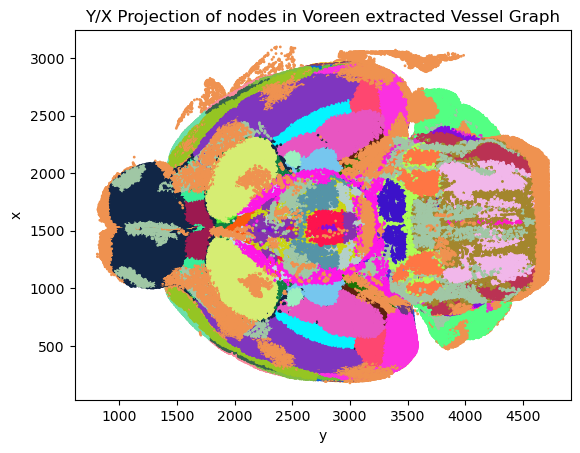

In [29]:
array=np.array((df_filt))

x = array[:,1]
y = array[:,2]
z = array[:,3]
c = array[:,7]

plt.title("Y/X Projection of nodes in Voreen extracted Vessel Graph")
plt.xlabel("y")
plt.ylabel("x")
plt.scatter(y,x,s=1, c=c)
plt.show()

In [ ]:
# Manually pulled from 
#  https://atlas.brain-map.org/atlas?atlas=602630314#atlas=602630314&plate=576990141&structure=295&x=5775&y=3875&zoom=-3&resolution=16.00&z=3
names = {
'ACA': 'Anterior Cingulate Area',
 'AI': 'Agranular Insular Area',
 'AOB': 'Accessory Olfactory Bulb',
 'AOBgr': 'Accessory Olfactory Bulb, granular layer',
 'AON': 'Anterior Olfactory Nucleus',
 'AUD': 'Auditory areas',
 'BLA': 'Basolateral Amygdalar Nucleus',
 'BMA': '',
 'BS': '',
 'CA1sp': '',
 'CB': '',
 'CBXmo': '',
 'CNU': '',
 'COA': '',
 'CTXsp': '',
 'CUL4': '',
 'DORpm': '',
 'DORsm': '',
 'DP': '',
 'ECT': '',
 'EP': '',
 'FN': '',
 'FRP': '',
 'GU': '',
 'HB': '',
 'HPF': '',
 'HY': '',
 'ILA': '',
 'LA': '',
 'LSX': '',
 'LZ': '',
 'MB': '',
 'MBmot': '',
 'MBsen': '',
 'MEZ': '',
 'MO': '',
 'MY': '',
 'MY-mot': '',
 'MY-sat': '',
 'MY-sen': '',
 'OLF': '',
 'ORB': '',
 'P-mot': '',
 'P-sat': '',
 'P-sen': '',
 'PA': '',
 'PAA': '',
 'PAL': '',
 'PALc': '',
 'PALm': '',
 'PALv': '',
 'PAR': '',
 'PERI': '',
 'PIR': '',
 'PL': '',
 'POST': '',
 'PRE': '',
 'PVR': '',
 'PVZ': '',
 'RHP': '',
 'RSP': '',
 'SNc': '',
 'SS': '',
 'STRv': '',
 'SUB': '',
 'TEa': '',
 'TR': '',
 'TT': '',
 'VIS': '',
 'VISC': '',
 'VS': '',
 'bgr': '',
 'fiber tracts': '',
 'root': '',
 'sAMY': ''}